In [1]:
import matplotlib.pyplot as plt
import netron
import numpy as np
import seaborn as sns
import torch

from machine_learning.classes import OptimizerConfigs, TrainConfigs
from machine_learning.autoencoders.feedforward_autoencoder import FeedforwardAutoencoder, FeedforwardCoderConfigs, init_encoder, init_decoder, load, save
from machine_learning.strings import bce_loss_str, l1_str
from machine_learning.utils.utils_mnist import load_mnist_data_for_autoencoder
from machine_learning.utils.utils_nn import init_loss, train
from machine_learning.utils.utils_plot import plot_mnist_images

In [2]:
plt.style.use('seaborn-whitegrid')
sns.set_color_codes()

figsize = (20, 4)

In [5]:
torch.manual_seed(0)

### data

In [6]:
dirpath = "../data/pytorch_mnist"
X_train_loader, X_val_loader, X_test_loader = load_mnist_data_for_autoencoder(dirpath, flatten=True)
X_test, _ = next(iter(X_test_loader))

In [7]:
x_dim = 784
z_dim = 32
h_dims = [128, 64]

In [8]:
n_epochs = 50
patience = 50

In [9]:
verbose = True
verbose_freq = n_epochs / 10

In [10]:
n_samples = 10
n_rows = 2

### zero hidden layers

In [11]:
coder_configs = FeedforwardCoderConfigs(x_dim=x_dim, z_dim=z_dim, batch_norm=True)

In [12]:
encoder = init_encoder(**coder_configs.dict())
decoder = init_decoder(**coder_configs.dict())
model = FeedforwardAutoencoder(coder_configs, encoder, coder_configs, decoder)

In [13]:
optimizer_configs = OptimizerConfigs()

In [14]:
configs = TrainConfigs(optimizer_configs=optimizer_configs, n_epochs=n_epochs, patience=patience)

In [15]:
criterion = init_loss(bce_loss_str)

In [16]:
best_state_dict, best_val_loss, best_epoch = train(configs, model, X_train_loader, X_val_loader, 
                                                criterion, verbose, verbose_freq)

epoch 0, train loss 0.0012524641805017988, val loss 0.0008525689877569675
epoch 5, train loss 0.000499813737347722, val loss 0.0004896143556882938
epoch 10, train loss 0.0004326740309285621, val loss 0.0004319151248782873
epoch 15, train loss 0.0004157663903509577, val loss 0.0004177235395958026
epoch 20, train loss 0.00041122624309112627, val loss 0.0004136787485331297
epoch 25, train loss 0.0004091515483645101, val loss 0.0004118160487463077
epoch 30, train loss 0.00040791814339657625, val loss 0.0004107349111388127
epoch 35, train loss 0.0004070885746429364, val loss 0.0004100585741301378
epoch 40, train loss 0.0004064927073195577, val loss 0.0004095945643881957
epoch 45, train loss 0.0004060483194577197, val loss 0.0004092690863957008


In [17]:
best_val_loss, best_epoch

(0.0004090673252940178, 49)

In [18]:
encoder = init_encoder(**coder_configs.dict())
decoder = init_decoder(**coder_configs.dict())
best_model = FeedforwardAutoencoder(coder_configs, encoder, coder_configs, decoder)
best_model.load_state_dict(best_state_dict)

<All keys matched successfully>

In [19]:
best_model.eval()
samples = X_test[:n_samples]
samples_hat = best_model(samples)
samples_hat = samples_hat.detach().numpy()

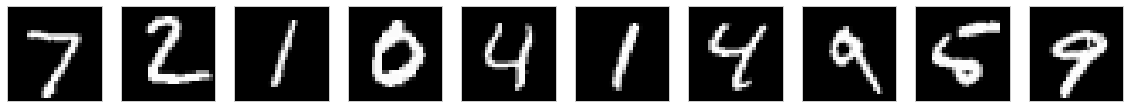

In [20]:
plot_mnist_images(samples, figsize)

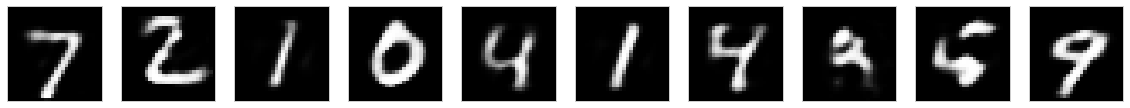

In [21]:
plot_mnist_images(samples_hat, figsize)

### 2 hidden layers

In [22]:
coder_configs = FeedforwardCoderConfigs(x_dim=x_dim, z_dim=z_dim, h_dims=h_dims, batch_norm=False)

In [23]:
encoder = init_encoder(**coder_configs.dict())
decoder = init_decoder(**coder_configs.dict())
model = FeedforwardAutoencoder(coder_configs, encoder, coder_configs, decoder)

In [24]:
optimizer_configs = OptimizerConfigs()

In [25]:
configs = TrainConfigs(optimizer_configs=optimizer_configs, n_epochs=n_epochs, patience=patience)

In [26]:
criterion = init_loss(bce_loss_str)

In [27]:
best_state_dict, _, _ = train(configs, model, X_train_loader, X_val_loader, 
                                                criterion, verbose, verbose_freq)

epoch 0, train loss 0.0011913072920093934, val loss 0.0009552451396981876
epoch 5, train loss 0.0005569241751606265, val loss 0.0005466539959112803
epoch 10, train loss 0.0004920384899402659, val loss 0.0004897380974143744
epoch 15, train loss 0.00045845015859231355, val loss 0.0004580646542211374
epoch 20, train loss 0.00043732316667834917, val loss 0.00043794146242241065
epoch 25, train loss 0.0004174715098924935, val loss 0.0004198556616902351
epoch 30, train loss 0.00040344841545447707, val loss 0.0004062460642307997
epoch 35, train loss 0.0003907761344065269, val loss 0.0003947023743142684
epoch 40, train loss 0.00038329853086421886, val loss 0.00038711081879834333
epoch 45, train loss 0.0003783505560519795, val loss 0.00038255799934267995


In [28]:
encoder = init_encoder(**coder_configs.dict())
decoder = init_decoder(**coder_configs.dict())
best_model = FeedforwardAutoencoder(coder_configs, encoder, coder_configs, decoder)
best_model.load_state_dict(best_state_dict)

<All keys matched successfully>

In [29]:
best_model.eval()
samples = X_test[:n_samples]
samples_hat = best_model(samples)
samples_hat = samples_hat.detach().numpy()

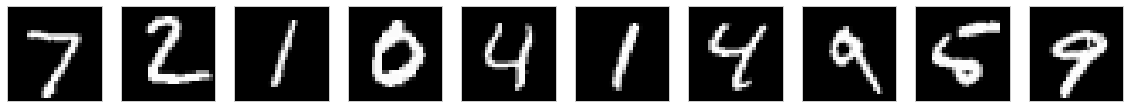

In [30]:
plot_mnist_images(samples, figsize)

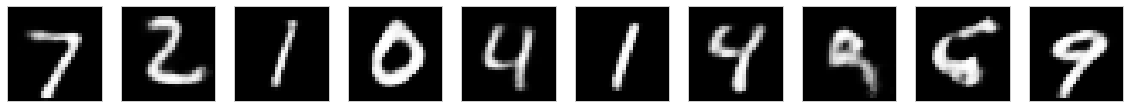

In [31]:
plot_mnist_images(samples_hat, figsize)

In [32]:
Z_val = best_model.encode(X_test)
Z_val.mean()

tensor(5.6140, grad_fn=<MeanBackward0>)

### 2 hidden layers and L1 regularization

In [33]:
coder_configs = FeedforwardCoderConfigs(x_dim=x_dim, z_dim=z_dim, h_dims=h_dims, batch_norm=False)

In [34]:
encoder = init_encoder(**coder_configs.dict())
decoder = init_decoder(**coder_configs.dict())
model = FeedforwardAutoencoder(coder_configs, encoder, coder_configs, decoder)

In [35]:
optimizer_configs = OptimizerConfigs(lamda=10e-6, regularizer_name=l1_str)

In [36]:
configs = TrainConfigs(optimizer_configs=optimizer_configs, n_epochs=n_epochs, patience=patience)

In [37]:
criterion = init_loss(bce_loss_str)

In [38]:
best_state_dict, _, _ = train(configs, model, X_train_loader, X_val_loader, 
                                                criterion, verbose, verbose_freq)

epoch 0, train loss 0.0013445095991094908, val loss 0.0009992419170836609
epoch 5, train loss 0.0008892926098778844, val loss 0.0008245849385857582
epoch 10, train loss 0.0007786985306690137, val loss 0.0007233320909241836
epoch 15, train loss 0.0007183249751105905, val loss 0.0006650888336201509
epoch 20, train loss 0.0007000148821001251, val loss 0.0006507862980167071
epoch 25, train loss 0.000687301464068393, val loss 0.000632895290851593
epoch 30, train loss 0.0006663589474434654, val loss 0.0006155443166693051
epoch 35, train loss 0.0006589561228950818, val loss 0.000608881663531065
epoch 40, train loss 0.0006541755013167858, val loss 0.0006043667892615001
epoch 45, train loss 0.0006504083536565304, val loss 0.000600457590073347


In [39]:
encoder = init_encoder(**coder_configs.dict())
decoder = init_decoder(**coder_configs.dict())
best_model = FeedforwardAutoencoder(coder_configs, encoder, coder_configs, decoder)
best_model.load_state_dict(best_state_dict)

<All keys matched successfully>

In [40]:
best_model.eval()
samples = X_test[:n_samples]
samples_hat = best_model(samples)
samples_hat = samples_hat.detach().numpy()

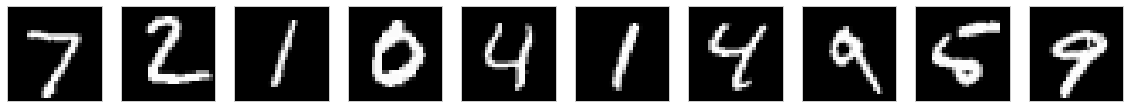

In [41]:
plot_mnist_images(samples, figsize)

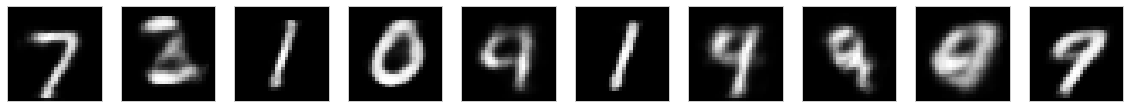

In [42]:
plot_mnist_images(samples_hat, figsize)

In [43]:
# losing accuracy, gaining sparsity
Z_val = best_model.encode(X_test)
Z_val.mean()

tensor(5.4040, grad_fn=<MeanBackward0>)

### saving and loading

In [44]:
filename_pt = "feedforward_autoencoder.pt"
save(best_model, filename_pt)

In [45]:
saved_model = load(filename)

In [46]:
saved_model.eval()
samples_hat = saved_model(samples)
samples_hat = samples_hat.detach().numpy()

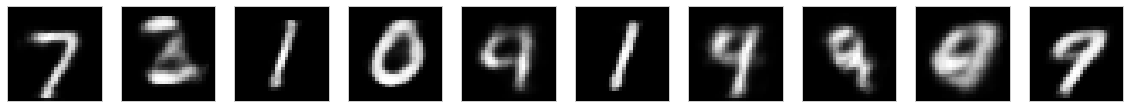

In [47]:
plot_mnist_images(samples_hat, figsize)

### visualizing network architecture

In [49]:
filename_onnx = "feedforward_autoencoder.onnx"
dummy_input = torch.randn(10, 1, 784)
torch.onnx.export(best_model, dummy_input, filename_onnx)

In [52]:
netron.start(filename_onnx)

Serving 'feedforward_autoencoder.onnx' at http://localhost:8080


('localhost', 8080)